## 離散フーリエ変換

複素平面ストップウォッチ$F_k(t) = (\omega^{k})^t(\omega^k = \mathrm{e}^{2\pi\mathrm{i}/n\cdot{k}})$と$n$要素のベクトルとして格納されている信号${\bf s}$の関係を表す下記方程式(参照 /2020-11-12/stopwatch/正弦波の重み付き和としての信号.ipynb
)について考察する。

$
\left(
    \begin{array}{c|c|c|c|c}
        F_0(0) & F_1(0) & F_2(0) &  & F_{n-1}(0) \\
        F_0(1) & F_1(1) & F_2(1) &  & F_{n-1}(1) \\
        F_0(2) & F_1(2) & F_2(2) & \ldots & F_{n-1}(2) \\
        \vdots & \vdots & \vdots &  & \vdots \\
        F_0(n-1) & F_1(n-1) & F_2(n-1) &  & F_{n-1}(n-1)
    \end{array}
\right)
\left(
    \begin{array}{c}
        z_0 \\
        z_1 \\
        z_2 \\
        \vdots \\
        z_{n-1}
    \end{array}
\right)
= \left(
    \begin{array}{c}
        f(0) \\
        f(1) \\
        f(2) \\
        \vdots \\
        f(n-1)
    \end{array}
\right)
= {\bf s}
$

左辺の行列をここではフーリエ行列と呼び、$\mathcal{F}$とする。左辺のベクトルはフーリエ係数と呼ぶ。

$
\mathcal{F} =\left(
    \begin{array}{c|c|c|c|c}
        F_0(0) & F_1(0) & F_2(0) &  & F_{n-1}(0) \\
        F_0(1) & F_1(1) & F_2(1) &  & F_{n-1}(1) \\
        F_0(2) & F_1(2) & F_2(2) & \ldots & F_{n-1}(2) \\
        \vdots & \vdots & \vdots &  & \vdots \\
        F_0(n-1) & F_1(n-1) & F_2(n-1) &  & F_{n-1}(n-1)
    \end{array}
\right)
$

$\mathcal{F}$の逆行列$\mathcal{F}^{-1}$を${\bf s}$に左からかける形で上記方程式を次のように変形する。

$
\mathcal{F}^{-1}{\bf s} 
= \left(
    \begin{array}{c}
        z_0 \\
        z_1 \\
        z_2 \\
        \vdots \\
        z_{n-1}
    \end{array}
\right)
$

こうすることで信号${\bf s}$をフーリエ係数に変換することができる。この処理を離散フーリエ変換と呼ぶ。計算量は$O(n^2)$である。この計算量をある制限下で$O(n\mathrm{log}_2n)$に落とし込むのが高速フーリエ変換である。

## 高速フーリエ変換

その制限とは

* $n$が2の累乗であること
* $\omega^n=1$であること($\omega^k = \mathrm{e}^{-2\pi\mathrm{i}/n\cdot{k}}$)

$
\mathcal{F}^{-1} = \left(
    \begin{array}{c|c|c|c|c}
        \omega^{0\cdot0} & \omega^{0\cdot1} & \omega^{0\cdot2} &  & \omega^{0\cdot(n-1)} \\
        \omega^{1\cdot0} & \omega^{1\cdot1} & \omega^{1\cdot2} &  & \omega^{1\cdot(n-1)} \\
        \omega^{2\cdot0} & \omega^{2\cdot1} & \omega^{2\cdot2} & \ldots & \omega^{2\cdot(n-1)} \\
        \vdots & \vdots & \vdots &  & \vdots \\
        \omega^{(n-1)\cdot0} & \omega^{(n-1)\cdot1} & \omega^{(n-1)\cdot2} &  & \omega^{(n-1)\cdot(n-1)} \\
    \end{array}
\right)
$

フーリエ係数の要素は次のような多項式の値として捉えることができる。

先に例を示す。

$
z_0 = {\bf s}_0 + {\bf s}_1\omega^0 + {\bf s}_2(\omega^0)^2 + \ldots + {\bf s}_{n-1}(\omega^0)^{n-1}
$

信号ベクトル${\bf s}$を、複素平面ストップウォッチからフーリエ係数への多項式関数$s$と定義できる。

$
s(x) = {\bf s}_0 + {\bf s}_1x + {\bf s}_2x^2 + \ldots + {\bf s}_{n-1}x^{n-1}
$

例えば$z_0 = s(\omega^0)$である。

次に、$s$を偶数番目と奇数番目で分けてそれぞれの多項式関数を考える。

$
s_{even}(x) = {\bf s}_0 + {\bf s}_2x + {\bf s}_4x^2 + \ldots + {{\bf s}_{n-2}}^{\frac {n-2} 2
}$

$
s_{odd}(x) = {\bf s}_1 + {\bf s}_3x + {\bf s}_5x^2 + \ldots + {{\bf s}_{n-1}}^{\frac {n-2} 2
}$

すると$s(x)$は次のような式として得られる。

$
s(x) = s_{even}(x^2) + x \cdot s_{odd}(x^2)
$

## フーリエ係数を求める式まとめ

$z_0 = s(\omega^0) = s_{even}((\omega^0)^2) + \omega^0s_{odd}((\omega^0)^2)$

$z_1 = s(\omega^1) = s_{even}((\omega^1)^2) + \omega^1s_{odd}((\omega^1)^2)$

$z_2 = s(\omega^2) = s_{even}((\omega^2)^2) + \omega^2s_{odd}((\omega^2)^2)$

$\vdots$

$z_{n-1} = s(\omega^{n-1}) = s_{even}((\omega^{n-1})^2) + \omega^{n-1}s_{odd}((\omega^{n-1})^2)$

$\omega^n = 1$なので以下のような式が成り立つ。

$(\omega^0)^2 = (\omega^0)^2(\omega^{\frac n 2})^2 = (\omega^{0+{\frac n 2}})^2 = (\omega^{\frac n 2})^2$

$(\omega^1)^2 = (\omega^1)^2(\omega^{\frac n 2})^2 = (\omega^{1+{\frac n 2}})^2 = (\omega^{{\frac n 2} + 1})^2$

$(\omega^2)^2 = (\omega^2)^2(\omega^{\frac n 2})^2 = (\omega^{2+{\frac n 2}})^2 = (\omega^{{\frac n 2} + 2})^2$

$\vdots$

$(\omega^{{\frac n 2} - 1})^2 = (\omega^{{\frac n 2} - 1})^2(\omega^{\frac n 2})^2 = (\omega^{{{\frac n 2} - 1}+{\frac n 2}})^2 = (\omega^{n - 1})^2$

よって$s_{even}(x)$と$s_{odd}(x)$を評価する$x$は$(\omega^0)^2, (\omega^1)^2, \ldots, (\omega^{{\frac n 2} - 1})^2$の${\frac n 2}$個で十分ということになる。

また、$(\omega^0)^2, (\omega^1)^2, \ldots, (\omega^{{\frac n 2} - 1})^2 = (\omega^2)^0, (\omega^2)^1, \ldots, (\omega^2)^{{\frac n 2} - 1}$である。



## 一旦まとめ

$
\mathcal{F}^{-1}{\bf s} 
= \left(
    \begin{array}{c}
        z_0 \\
        z_1 \\
        z_2 \\
        \vdots \\
        z_{\frac n 2} \\
        z_{{\frac n 2}+1} \\
        z_{{\frac n 2}+2} \\
        \vdots \\
        z_{n-1}
    \end{array}
\right)
= \left(
    \begin{array}{c}
        s_{even}((\omega^2)^0) + \omega^0s_{odd}((\omega^2)^0) \\
        s_{even}((\omega^2)^1) + \omega^1s_{odd}((\omega^2)^1) \\
        s_{even}((\omega^2)^2) + \omega^2s_{odd}((\omega^2)^2) \\
        \vdots \\
        s_{even}((\omega^2)^0) + \omega^{\frac n 2}s_{odd}((\omega^2)^0) \\
        s_{even}((\omega^2)^1) + \omega^{{\frac n 2}+1}s_{odd}((\omega^2)^1) \\
        s_{even}((\omega^2)^2) + \omega^{{\frac n 2}+2}s_{odd}((\omega^2)^2) \\
        \vdots \\
        s_{even}((\omega^2)^{{\frac n 2} - 1}) + \omega^{n - 1}s_{odd}((\omega^2)^{{\frac n 2} - 1})
    \end{array}
\right)
$

各$s_{even}$と$s_{odd}$はそれぞれ`fft(w*w, s[::2])`と`fft(w*w, s[1::2])`で求められるので以降再帰的に処理できる(いまだによくわかっていないのでテキトー)

以下実装

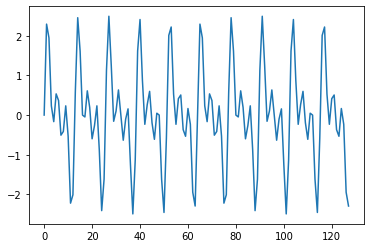

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# fft.py
from fft import fft

# 合成波のサンプルは(https://tips-memo.com/python-fft)より

# データ長
n = 128
x = np.arange(n)

# 周期
t1 = 10
t2 = 20
t3 = 30

s = sum(np.sin(t * x * 2 * np.pi / n) for t in [10, 20, 30])

plt.plot(s)

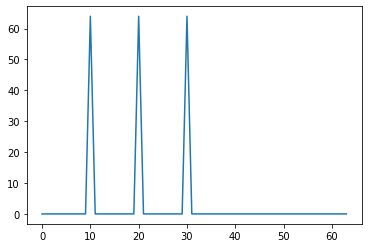

In [2]:
w = np.exp(-1j * 2*np.pi / n)

# fft.py
F = fft(w, s)
F_abs = np.abs(F)[:n//2]
plt.plot(F_abs)

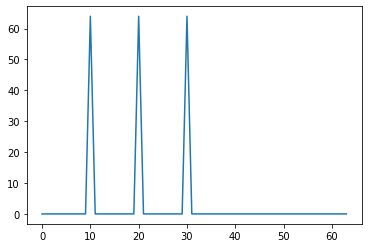

In [3]:
#numpyと比較

F = np.fft.fft(s)
F_abs = np.abs(F)[:n//2]
plt.plot(F_abs)